In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
import zipline

np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

In [6]:
import glob
import pybrain
import numpy as np
from pybrain.structure import FeedForwardNetwork
from pybrain.structure import LinearLayer, SigmoidLayer
from pybrain.structure import FullConnection
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import random
import ast
import time
import sqlalchemy
from sqlalchemy import *
from sqlalchemy import event
import sqlite3
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import *
import urllib2
import urllib
import json
import glob
import pprint
import dateutil.parser
import pprint
import re
from sklearn import linear_model, datasets
import time
from sklearn.naive_bayes import GaussianNB
import nltk
from collections import defaultdict
from sklearn import svm
pp = pprint.PrettyPrinter(indent=4)
import gevent.monkey
gevent.monkey.patch_socket()
import numpy
import time
import sqlalchemy
from sqlalchemy import *
from sqlalchemy import event
from sqlalchemy.dialects.mysql import LONGTEXT
import sqlite3
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import *
import urllib2
import urllib
import json
import pprint
import dateutil.parser
import gevent
import datetime
import marshal
from pylearn2.datasets.dense_design_matrix import DenseDesignMatrix

from __future__ import division
import os

import pylearn2
import numpy as np
from pylearn2.train import Train
from pylearn2.datasets.mnist import MNIST
from pylearn2.models import softmax_regression, mlp, svm
from pylearn2.training_algorithms import bgd, sgd
from pylearn2.termination_criteria import MonitorBased, EpochCounter
from pylearn2.train_extensions import best_params, live_monitoring
from pylearn2.utils import serial
from pylearn2.costs.mlp.dropout import Dropout
from pylearn2.costs.mlp import WeightDecay
from theano import function
from theano import tensor as T
import cPickle as pickle
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

Using gpu device 0: GRID K520


In [7]:
## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

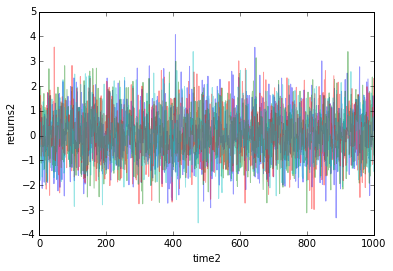

In [8]:
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time2')
plt.ylabel('returns2')

In [9]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[ 0.05519002  0.47670037  0.16928577  0.29882384]
[ 0.38504115  0.36449262  0.22988212  0.02058411]


In [10]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [11]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in xrange(n_portfolios)
])

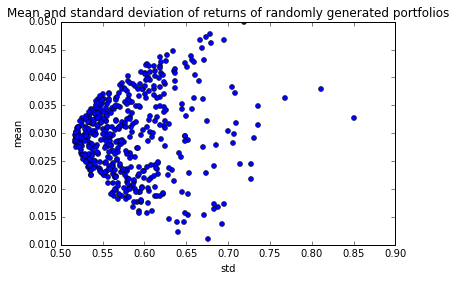

In [12]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

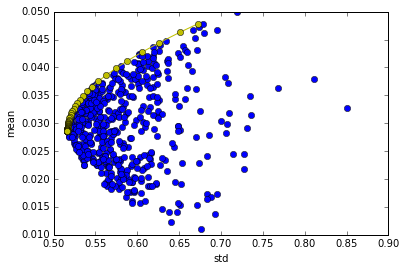

In [13]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In [14]:
print(weights)

[[  1.96246645e-01]
 [  7.38361973e-10]
 [  8.03752249e-01]
 [  1.10500474e-06]]


In [15]:
data = zipline.get_pricing(['IBM', 'GLD', 'XOM', 'AAPL', 
                    'MSFT', 'TLT', 'SHY'],
                     start_date='2005-06-07', end_date='2014-01-27')

AttributeError: 'module' object has no attribute 'get_pricing'

In [16]:
%%zipline --start 2005-1-1 --end 2014-1-1 --symbols AAPL -o perf_ipython

from zipline.api import symbol, order, record

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)

[2015-03-26 21:12:37.218460] INFO: Performance: Simulated 2265 trading days out of 2265.
[2015-03-26 21:12:37.219096] INFO: Performance: first open: 2005-01-03 14:31:00+00:00
[2015-03-26 21:12:37.219567] INFO: Performance: last close: 2013-12-31 21:00:00+00:00


AAPL


In [4]:
perf_ipython.head()

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_value,...,returns,sharpe,short_exposure,shorts_count,sortino,starting_cash,starting_value,trading_days,transactions,treasury_period_return
2010-01-04 21:00:00,28.84,0.000000,0.000000e+00,-0.038500,0.016043,0.000000,0.000000,0.0,10000000.0,0.0,...,0.000000e+00,NaN,0,0,0.000000,10000000.0,0.0,1,[],0.0385
2010-01-05 21:00:00,28.89,0.000000,-3.000000e-08,-0.037709,0.019209,0.145114,0.000002,-289.2,9999710.8,288.9,...,-3.000000e-08,NaN,0,0,0.000000,10000000.0,0.0,2,"[{u'commission': 0.3, u'amount': 10, u'sid': u...",0.0377
2010-01-06 21:00:00,28.43,0.000004,-5.200000e-07,-0.038580,0.019765,0.131850,0.000022,-284.6,9999426.2,568.6,...,-4.900000e-07,-8840.386314,0,0,-11445.813094,9999710.8,288.9,3,"[{u'commission': 0.3, u'amount': 10, u'sid': u...",0.0385
2010-01-07 21:00:00,28.38,0.000004,-6.500000e-07,-0.038571,0.023845,0.109566,0.000021,-284.1,9999142.1,851.4,...,-1.300001e-07,-10776.269916,0,0,-11445.002402,9999426.2,568.6,4,"[{u'commission': 0.3, u'amount': 10, u'sid': u...",0.0385
2010-01-08 21:00:00,28.56,0.000006,-1.400000e-07,-0.038319,0.026796,0.097318,0.000009,-285.9,9998856.2,1142.4,...,5.100003e-07,-6731.207608,0,0,-11375.545956,9999142.1,851.4,5,"[{u'commission': 0.3, u'amount': 10, u'sid': u...",0.0383


Populating the interactive namespace from numpy and matplotlib


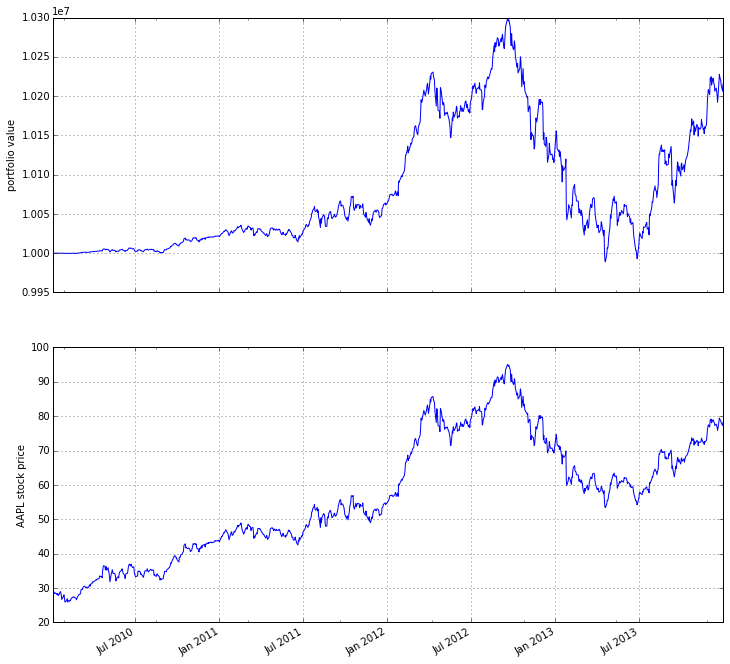

In [6]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
perf_ipython.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('portfolio value')
ax2 = plt.subplot(212, sharex=ax1)
perf_ipython.AAPL.plot(ax=ax2)
ax2.set_ylabel('AAPL stock price')

In [11]:
import pytz
from datetime import datetime

from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import load_bars_from_yahoo

# Load data manually from Yahoo! finance
start = datetime(2000, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2012, 1, 1, 0, 0, 0, 0, pytz.utc)
data = load_bars_from_yahoo(stocks=['AAPL'], start=start,
                            end=end)

# Define algorithm
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)

# Create algorithm object passing in initialize and
# handle_data functions
algo_obj = TradingAlgorithm(initialize=initialize, 
                            handle_data=handle_data)

# Run algorithm
perf_manual = algo_obj.run(data)

[2015-03-14 08:38:12.815230] INFO: Performance: Simulated 3019 trading days out of 3019.
[2015-03-14 08:38:12.815787] INFO: Performance: first open: 2000-01-03 14:31:00+00:00
[2015-03-14 08:38:12.816430] INFO: Performance: last close: 2011-12-30 21:00:00+00:00


AAPL


[2015-03-14 08:39:46.657608] INFO: Performance: Simulated 3521 trading days out of 3521.
[2015-03-14 08:39:46.658233] INFO: Performance: first open: 2000-01-03 14:31:00+00:00
[2015-03-14 08:39:46.658668] INFO: Performance: last close: 2013-12-31 21:00:00+00:00


AAPL


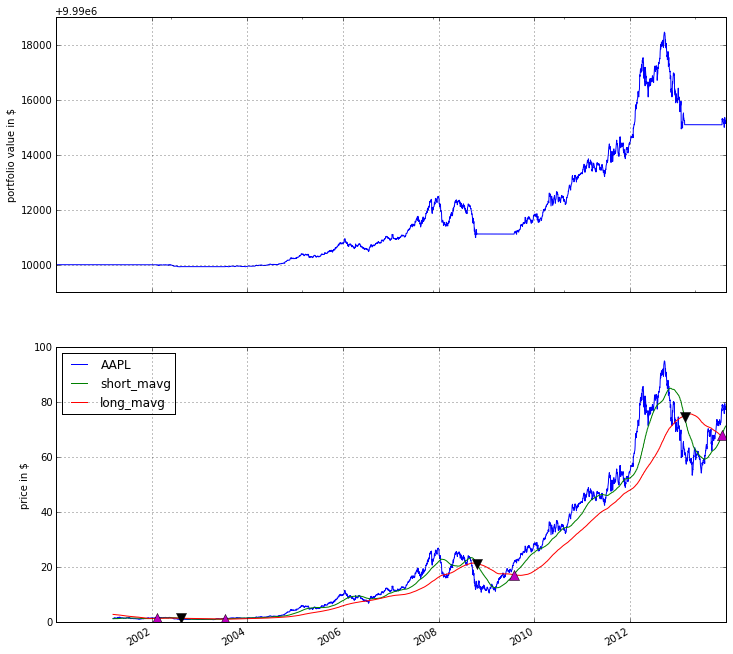

In [12]:
%%zipline --start 2000-1-1 --end 2014-1-1 --symbols AAPL -o perf_dma


from zipline.api import order_target, record, symbol, history, add_history
import numpy as np

def initialize(context):
    # Register 2 histories that track daily prices,
    # one with a 100 window and one with a 300 day window
    add_history(100, '1d', 'price')
    add_history(300, '1d', 'price')

    context.i = 0


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = history(100, '1d', 'price').mean()
    long_mavg = history(300, '1d', 'price').mean()

    # Trading logic
    if short_mavg[0] > long_mavg[0]:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(symbol('AAPL'), 100)
    elif short_mavg[0] < long_mavg[0]:
        order_target(symbol('AAPL'), 0)

    # Save values for later inspection
    record(AAPL=data[symbol('AAPL')].price,
           short_mavg=short_mavg[0],
           long_mavg=long_mavg[0])
    
    
def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show() 

In [18]:
#Manual Operation::

In [25]:
import pytz
from datetime import datetime

from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import load_bars_from_yahoo

# Load data manually from Yahoo! finance
start = datetime(2011, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2012, 1, 1, 0, 0, 0, 0, pytz.utc)
data = load_bars_from_yahoo(stocks=['AAPL'], start=start,
                            end=end)

# Define algorithm
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)

# Create algorithm object passing in initialize and
# handle_data functions
algo_obj = TradingAlgorithm(initialize=initialize, 
                            handle_data=handle_data)

AAPL


In [28]:
%%timeit -n1 -r1

# Run algorithm
perf_manual = algo_obj.run(data)

[2015-03-26 21:32:10.149667] INFO: Performance: Simulated 252 trading days out of 252.
[2015-03-26 21:32:10.150244] INFO: Performance: first open: 2011-01-03 14:31:00+00:00
[2015-03-26 21:32:10.150690] INFO: Performance: last close: 2011-12-30 21:00:00+00:00


1 loops, best of 1: 2.91 s per loop


perf_manual.plot(x=[1,100], y=[1, 100])



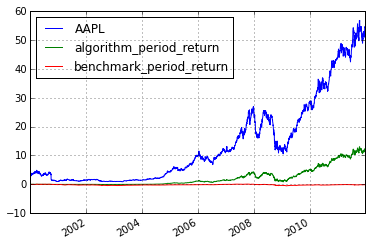

In [46]:
perf_manual.plot(y=['AAPL', 'algorithm_period_return', u'benchmark_period_return' ])

In [41]:
perf_manual.keys()

Index([u'AAPL', u'algo_volatility', u'algorithm_period_return', u'alpha', u'benchmark_period_return', u'benchmark_volatility', u'beta', u'capital_used', u'ending_cash', u'ending_value', u'excess_return', u'gross_leverage', u'information', u'long_exposure', u'longs_count', u'max_drawdown', u'net_leverage', u'orders', u'period_close', u'period_label', u'period_open', u'pnl', u'portfolio_value', u'positions', u'returns', u'sharpe', u'short_exposure', u'shorts_count', u'sortino', u'starting_cash', u'starting_value', u'trading_days', u'transactions', u'treasury_period_return'], dtype='object')